Ce este integrala dubla?

Definim o functie $f$ de doua variabile pe un dreptunghi inchis $R = [a,b]\times[c,d]=\{(x,y)\in\mathbb{R}|a\ll{x}\ll{b},c\ll{y}\ll{d}\}$. Graficul lui $f$ este suprafata descrisa de ecuatia $z = f(x,y)$. Pentru a afla volumul $V$ al solidului $S$. $S = \{(x,y,z)\in\mathbb{R^3}|\,\,0\ll{z}\ll{f(x,y)}\,\,,\,\,(x,y)\in\mathbb{R^2}\}$.
Primul pas este sa impartim dreptunghiul in subdreptunghiuri, intervalul $[a,b]$ il impartim in $m$ subintervale $[x_{i-1},x_i]$ echidistante cu $\Delta{x}=\frac{(b-a)}{m}$ si intervalul $[c,d]$ il impartim in $n$ subintervale $[y_{j-1},y_j]$ echidistante cu $\Delta{y}=\frac{(d-c)}{n}$

Din aceste subintervale formam subdreptunghiurile $R_{ij} = [x_{i-1},x_i]\times[y_{j-1},y_j]$
fiecare de suprafata $\Delta{A} = \Delta{x}\Delta{y}$

Alegand pentru fiecare subinterval cate un punct $(x_{ij}^*,y_{ij}^*)$, iar volumul unui cuboid de sub graficul lui $f$ are volumul $\Delta{A}*f(x_{ij}^*,y_{ij}^*)$

Insumand toate aceste volume de cuboizi obtinem o aproximare a volumului $V$. 
$$V\approx\sum_{i=1}^m\sum_{j=1}^nf(x_{ij}^*,y_{ij}^*)*\Delta{A}$$

Integrala dubla este limita la infinit a sumelor.
$$\iint_R{f(x,y)dA} = \lim_{{m,n}\rightarrow\infty}\sum_{i=1}^m\sum_{j=1}^nf(x_{ij}^*,y_{ij}^*)*\Delta{A}$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
%matplotlib inline

   Pentru studiu alegem o functie: 
       $$f:\mathbb{R}\rightarrow\mathbb{R}\ \ \ \ f(x,y) = e^{-(x^2+y^2)}$$
   In cele ce urmeaza este prezentata integrarea numerica a functiei noastre cu ajutorul cuboizilor. Graficul este facut pe un patrat $\mathbb{D} = [0,1]\times[0,1]$

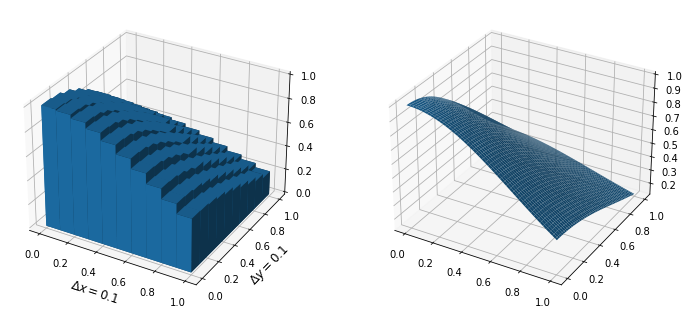

In [15]:
def f(x,y):
        return np.exp(-x**2 - y**2)
    
def desen_cuboid_aprox(n):
    _x = np.linspace(0,1,100)
    _y = np.linspace(0,1,100)
    _xbars = np.linspace(0,1,n,endpoint = False)
    _ybars = np.linspace(0,1,n,endpoint = False)
    dx = _xbars[1] - _xbars[0]
    dy = _ybars[1] - _ybars[0]

    _xx,_yy = np.meshgrid(_x,_y)
    _xxbars,_yybars = np.meshgrid(_xbars,_ybars)
    fig = plt.figure(figsize = (12,12))
    x,y = _xxbars.ravel(),_yybars.ravel()
    ax = fig.add_subplot(221,projection = '3d')
    ax.set_xlabel('$\Delta{x} = $' + str(dx),fontsize = 12)
    ax.set_ylabel('$\Delta{y} = $' + str(dy),fontsize = 12)
    ax.bar3d(x,y,np.zeros(len(x)),dy,dx,f(x,y),shade = True)
    fig.add_subplot(222,projection = '3d').plot_surface(_xx,_yy,f(_xx,_yy))
    plt.show()

#aproximare cu n = 10
desen_cuboid_aprox(10)

Pentru a obtine o aproximare cat mai fina a volumului corpului de sub suprafata data de functia noastra, micsoram intervalele $\Delta{x}$ si $\Delta{y}$. De preferat este ca $\Delta{x}\rightarrow0$ si $\Delta{y}\rightarrow0$ pentru ca aproximarea noastra sa fie cat mai aproape de realitate.

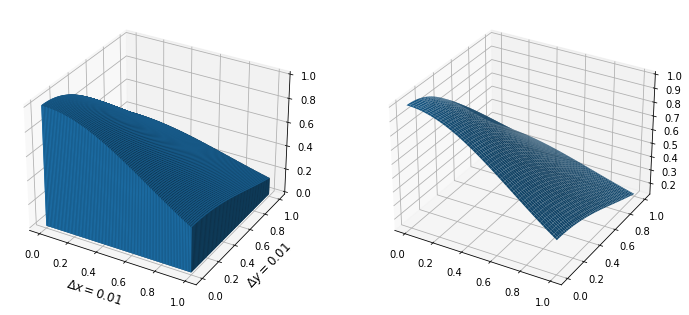

In [3]:
#aproximare cu n = 100
desen_cuboid_aprox(100)

In [10]:
def num_cuboid_aprox(x_inf,x_sup,y_inf,y_sup,n):
    sum = 0
    x = np.linspace(x_inf,x_sup,n)
    y = np.linspace(y_inf,y_sup,n)
    X,Y = np.meshgrid(x,y)
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    fRes = f(X,Y)
    for i in range(n):
        for j in range(n):
            sum += fRes[i][j]*dx*dy
    return round(sum,5)

Decidem sa calculam integrala functiei noastre $f$, pe $\mathbb{R}^2$ si pe $\mathbb{D}$, numeric cu ajutorul functiei definite mai sus.
Si obtinem urmatarele rezultate.

In [24]:
display(sp.Eq(sp.Integral(sp.Integral(sp.exp('-(x^2 + y^2)'),('x',-sp.oo,sp.oo)),('y',-sp.oo,sp.oo)),num_cuboid_aprox(-100,100,-100,100,2000)))
display(sp.Eq(sp.Integral(sp.Integral(sp.exp('-(x^2 + y^2)'),('x',0,1)),('y',0,1)),num_cuboid_aprox(0,1,0,1,2000)))

Eq(Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)), 3.14159)

Eq(Integral(exp(-x**2 - y**2), (x, 0, 1), (y, 0, 1)), 0.55826)

Folosindu-ne de libraria sympy, calculam aceleasi integrale pentru a verifica rezultatele obtinute.

In [8]:
display(sp.Eq(sp.Integral(sp.Integral(sp.exp('-(x^2 + y^2)'),('x',-sp.oo,sp.oo)),('y',-sp.oo,sp.oo)),sp.integrate(sp.integrate(sp.exp('-(x^2 + y^2)'),('x',-sp.oo,sp.oo)),('y',-sp.oo,sp.oo))))
display(sp.Eq(sp.Integral(sp.Integral(sp.exp('-(x^2 + y^2)'),('x',0,1)),('y',0,1)),round(sp.integrate(sp.integrate(sp.exp('-(x^2 + y^2)'),('x',0,1)),('y',0,1)).evalf(),5)))

Eq(Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)), pi)

Eq(Integral(exp(-x**2 - y**2), (x, 0, 1), (y, 0, 1)), 0.55775)

Metode de calcul a integralelor duble.

Integrale pe dreptunghiuri.

Integralele pe dreptunghiuri pot fi tratate ca integrale iterate. Luam ca exemplu o functie $f:\mathbb{R}\rightarrow\mathbb{R}$ $f(x,y) = xy$.
Alegem si un dreptunghi $D = [0,2]\times[1,3]$

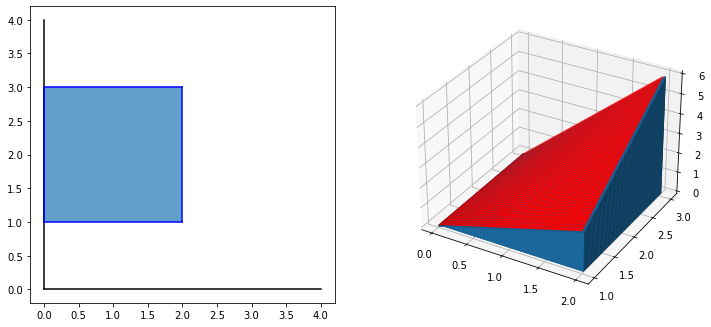

In [106]:
x,y = np.linspace(0,2,100),np.linspace(1,3,100)
_x,_y = np.meshgrid(x,y)

_z = _x*_y
_xx = _x.ravel()
_yy = _y.ravel()
_zz = _xx*_yy
dx = x[1] - x[0]
dy = y[1] - y[0]
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax1.plot([0,0],[0,4],'k')
ax1.plot([0,4],[0,0],'k')
ax1.plot([0,2],[1,1],'b')
ax1.plot([0,2],[3,3],'b')
ax1.plot([0,0],[1,3],'b')
ax1.plot([2,2],[1,3],'b')
ax1.fill_between([0,2],[3,3],[1,1],alpha = .7)
ax2 = fig.add_subplot(222,projection = '3d')
ax2.set_xticks([0,.5,1,1.5,2])
ax2.set_yticks([1,1.5,2,2.5,3])
ax2.plot_surface(_x,_y,_z,color = 'r')
ax2.bar3d(_xx,_yy,np.zeros(len(_xx)),dy,dx,_zz-.065,shade = True)

plt.show()

$$\iint_{D}xy\,\,dxdy=\int_0^2\int_1^3xy\,\,dxdy$$

Teorema lui Fubini ne spune ca putem schimba ordinea integrarii dupa bunul plac astfel:
$$\int_0^2\Bigg(\int_1^3xydy\Bigg)dx=\int_1^3\Bigg(\int_0^2xydx\Bigg)dy$$
Integrand prima data dupa y obtinem:
$$\int_0^2\Bigg(\int_1^3xydy\Bigg)dx=\int_0^2x\Bigg(\frac{y^2}{2}\Bigg)\Bigg|_1^3dx=\int_0^2x\Bigg(\frac{3^2-1}{2}\Bigg)dx$$
Si ne mai ramane doar sa integram dupa x astfel ca rezultatul nostru este:
$$2\frac{8}{2}=8$$
In final integram si cu ajutorul sympy pentru a verifica rezultatul. Constatam ca totul este in regula si trecem mai departe.

In [4]:
display(sp.Eq(sp.Integral(sp.Integral('x*y',('y',1,3)),('x',0,2)),sp.integrate(sp.integrate('x*y',('y',1,3)),('x',0,2))))

Eq(Integral(x*y, (y, 1, 3), (x, 0, 2)), 8)

Integrale pe domeniu integrafic. In acest caz putem trata in aceeasi maniera ca o integrala pe un dreptunghi. Singura diferenta consta in faptul ca laturile domeniului nostru nu sunt orizontale sau verticale ci variabile.
Un domeniu de acest tip este spre exemplu: $D = \{(x,y)\in\mathbb{R}^2\,\,|\,\,0\le{x}\le{1},x\le{y}\le{x^2} \}$

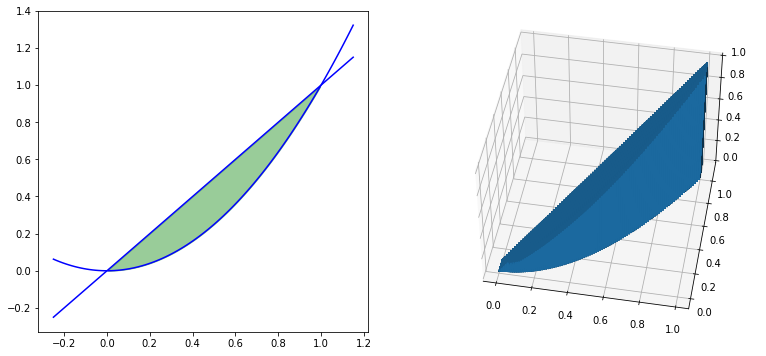

In [130]:
x = np.linspace(-0.25,1.15,100)
y1 = x
y2 = x**2
fig = plt.figure(figsize=(13,13))
ax1 = fig.add_subplot(221)
ax1.plot(x,y1,'b')
ax1.plot(x,y2,'b')
ax1.fill_between(x,y1,y2,where = [(t>0) and (t<1) for t in x],alpha = .4,color = 'green')

x3 = np.linspace(0,1,100,endpoint = False)
y3 = []
for i in range(len(x3)):
    y3.append(np.linspace(x3[i]**2,x3[i],100,endpoint = False))
    
x_aux = []
for i in range(100):
    x_aux.append(np.full((1,100),x3[i]))
x3 = x_aux
_xx = np.array(x3).ravel()
_yy = np.array(y3).ravel()

_zz = np.linspace(0,1,10000)

dx = 0.1
dy = 0.009

ax2 = fig.add_subplot(222,projection = '3d')


ax2.bar3d(_xx,_yy,0,dy,dx,_zz,shade = True)
ax2.view_init(45,-80)


plt.show()

Aici Teorema lui Fubini nu se mai aplica. Prima data se integreaza dupa capetele variabile. Capatul superior este "functia" mai mare si cel inferior "functia" mai mica. Aici $x\lt{x^2}$ pe intervalul ales pentru $x$ adica $[0,1]$. Alegem sa integram tot functia $f$ folosita mai sus si integrala noastra devine:
$$\int_0^1\int_{x^2}^xxy\,\,dydx$$
Incepem integrarea dupa y si obtinem:
$$\int_0^1\Bigg(\int_{x^2}^xxy\,\,dy\Bigg)dx=\int_0^1\Bigg(x\frac{y^2}{2}\Bigg|_{x^2}^x\Bigg)dx$$
Continuam si integram si dupa x:
$$\int_0^1\Bigg(x\frac{x^2-x^4}{2}\Bigg)dx=\frac{1}{2}\Bigg(\frac{x^4}{4}-\frac{x^6}{6}\Bigg)\Bigg|_0^1=\frac{1}{24}$$
Ne folosim si aici de sympy pentru a ne verifica.

In [5]:
display(sp.Eq(sp.Integral(sp.Integral('x*y',('y','x^2','x')),('x',0,1)),sp.integrate(sp.integrate('x*y',('y','x^2','x')),('x',0,1))))

Eq(Integral(x*y, (y, x**2, x), (x, 0, 1)), 1/24)

Integrale pe cercuri.$$ $$
Aici domeniile pe care le integram au forma unor cercuri. Spre exemplu: $D = \{(x,y)\in\mathbb{R}^2|\,\,x^2+y^2\le9\}$
Aceste integrale se pot calcula tot ca niste integrale pe domenii intergrafice explicitand in functie de una dintre variabile. O metoda mai facila consta in trecerea la coordonate polare. In cazul in care forma ecuatiei cercului nu este una simpla, aducem la forma canonica si facem parametrizarea. Integrala pe care o calculam este urmatoarea:
$$\iint_Dx^2+y^2\,\,dxdy$$
Parametrizarea se face astfel:
$$\begin{cases}x = r\cos{\theta}\\ y = r\cos{\theta}\end{cases}\,\,\,\,\, r = [0,3]\,\,\,\,\theta = [0,2\pi]$$
$r$ si $\theta$ se afla din ecuatia cercului si conditii impuse in definirea domeniului.

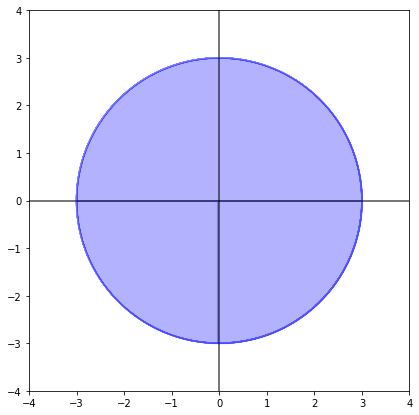

In [37]:
R = 3
def f(t): return R*np.sin(t*np.pi)
def g(t): return R*np.cos(t*np.pi)
t = np.linspace(-4,4,1000)
plt.figure(figsize = (7,7))
plt.axis([-4,4,-4,4])
plt.plot(t,0*t,color = 'black',alpha = 0.7)
plt.plot(0*t,t,color = 'black',alpha = 0.7)
plt.plot(f(t),g(t),color = 'blue',alpha = 0.5)
plt.gca().set_aspect('equal')
plt.fill_between(f(t),g(t),where = [(t>=-1) and (t<=1.01) for t in t],color = 'blue',alpha = 0.3)
plt.show()

Pentru ca parametrizarea sa fie completa trebuie schimbate si diferentialele in felul urmator:
$$dxdy=|J|drd\theta$$
$J$ este matricea Jacobiana.
$$J = \Bigg(\begin{matrix}x_r&x_t\\ y_r&y_t\end{matrix}\Bigg)$$
Determinantul ei pentru parametrizarea facuta este $r$. Integrala noastra sufera urmatoarea transformare in urma parametrizarii:
$$\iint_Dx^2+y^2\,\,dxdy = \int_0^3\int_0^{2\pi}r^2\sin^2\theta+r^2\cos^2\theta\,\, r\,\,d\theta\,dr$$
Integrala este relativ simpla si rezultatul este:
$$2\pi\Bigg(\frac{r^4}{4}\Bigg)\Bigg|_0^3=\frac{2\pi*3^4}{4}$$

Sympy ofera posibilitatea de a afla un jacobian eventual mai complicat, din fericire nu este nevoie de asa ceva. Jacobianul se poate calcula astfel:

In [149]:
X = sp.Matrix(['r*cos(theta)','r*sin(theta)'])
Y = sp.Matrix(['r','theta'])
jac = X.jacobian(Y)
print("Matricea Jacobiana este:")
display(jac)
print("Determinantul este:")
display(sp.Eq(jac.det(),jac.det().simplify()))

Matricea Jacobiana este:


Matrix([
[cos(theta), -r*sin(theta)],
[sin(theta),  r*cos(theta)]])

Determinantul este:


Eq(r*sin(theta)**2 + r*cos(theta)**2, r)

In [156]:
display(sp.Eq(sp.Integral(sp.Integral('x^2+y^2',('y','-sqrt(9-x^2)','sqrt(9-x^2)')),('x',-3,3)),sp.integrate(sp.integrate('x^2+y^2',('y','-sqrt(9-x^2)','sqrt(9-x^2)')),('x',-3,3))))

Eq(Integral(x**2 + y**2, (y, -sqrt(9 - x**2), sqrt(9 - x**2)), (x, -3, 3)), 81*pi/2)

Integrala Gaussiana folosind integrale duble.$$ $$
O proprietate a integralelor duble consta in urmatoarea afirmatie. Daca avem o functie $f(x,y)$ ce poate fi scrisa ca produs de doua functii $g(x)h(y)$, atunci: $$\iint{f(x,y)}\,\,dxdy = \int g(x)\,\,dx\int h(y)\,\,dy$$
Notam: $$I = \int_{-\infty}^\infty e^{-x^2}dx$$
$$I^2 = \int_{-\infty}^\infty e^{-x^2}dx\int_{-\infty}^\infty e^{-y^2}dy = \int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}\,\,dxdy$$
Pentru calcularea lui $I^2$ stapanim deja toate mijloacele necesare calcularii ei. Trecem la coordonate polare si obtinem:
$$\int_{0}^\infty\int_{0}^{2\pi}e^{-r^2}r\,\,d\theta\,dr = \pi$$
Acest rezultat l-am obtinut prin metodele folosite la inceput. Calculat atat cu Sympy cat si prin aproximare.$$ $$
De aici obtinem ca $I^2 = \pi$ deci $$\int_{-\infty}^\infty e^{-x^2}dx = \sqrt\pi$$